## Programski jezik Python 
### i rad sa tabelarno predstavljenim podacima i biblioteka Pandas

U okviru ovog predavanja naučićeš:
* Kako se učitava .csv fajl
* Kako prikazati tabelu
* Kako pro;itati dimenziju tabele
* Kako prikazati početak tabele
* Kako prikazati kraj tabele
* Kako izdvojiti kolonu (cela, deo)
* Kako izdvojiti vrstu 
* Kako izdvojiti jednu ćeliju
* Šta je to iteracija?
* Sumiranje
* Kako da napišeš funkciju
* Šta je grananje
* Kako da filtriramo?
* Kako grupisati?
* Kako vizuelno predstaviti podatke.


### Učitavanje i prikaz

In [1]:
import pandas as pd #učitavanje pandas biblioteke
skole = pd.read_csv("skole.csv") #učitavanje jednog csv fajla
#skole  #ispis tabele

In [ ]:
#dimenzija tabele
skole.info()

### Izdvajanje kolone

In [ ]:
skole["Okrug"]

In [ ]:
skole.loc[1,"Okrug"] = None
skole["Okrug"].size

### Ispis prvih 10 elemenata kolone

In [ ]:
skole["Okrug"].head(10)

### Ispis jednog elementa kolone

In [ ]:
skole["Okrug"][0] #ispisuje se prvi element iz kolone

In [ ]:
skole.columns

### Petlja for

In [ ]:
kurs = 117.2567
# menjaj vrednost cena_eur pa variraj
cena_eur = 350
cena_eur * kurs

In [ ]:
for cena_eur in [350, 100, 130, 150]:
    print(cena_eur, cena_eur * kurs)

In [ ]:
for i in range(10):
    print("Zdravo, svete!")

Napiši skript koji ispisuje cifre od 0 do 9.

In [26]:
god_kamata = 10
god_koeficijent = 1 + god_kamata/100
mes_koeficijent = god_koeficijent ** (1/12)
mes_kamata = (mes_koeficijent - 1) * 100
mes_kamata

0.7974140428903764

In [ ]:
anuitet = 1000
kredit = 100000
kamata = 10
broj_rata = 15
# plan otplate

In [ ]:
#skole["Broj ucenika - prvi razred"][0]
#skole["Broj ucenika - prvi razred"][1]
#skole["Broj ucenika - prvi razred"][2]
#....
#skole["Broj ucenika - prvi razred"][9]
for i in skole.index[:100]:
    print(skole.loc[i,"Broj ucenika - prvi razred"])

In [ ]:
skole["Okrug"].tail(10) #ispis poslednjih 10 elemenata kolone "Okrug"

Ovo možemo ispisati i pomoću petlje.

In [ ]:
for i in range(skole["Okrug"].count()-10, skole["Okrug"].count()):
     print(skole["Okrug"][i])

### Izdvajanje vrste

In [ ]:
skole.at[0] #izdvajamo 1. vrstu

In [ ]:
skole.loc[9] #izdvajamo 10. vrstu

In [ ]:
skole["Broj devojcica - prvi razred"][0] #pristupamo prvom elementu u koloni "Broj devojcica - prvi razred" 

In [ ]:
skole.loc[0]["Broj devojcica - prvi razred"] #može i ovako

In [ ]:
skole.loc[0, "Broj devojcica - prvi razred"] # i ovako

In [ ]:
skole.loc[0][14] #takođe i ovo

#### Gde je ovde petlja?

Podsetimo se, skole.loc[9] je jedna vrsta, čiji sadržaj čine određeni podaci.

In [ ]:
skole.loc[9]

Kako proći petljom kroz vrstu?

In [ ]:
for podatak in skole.loc[9]:
    print(podatak)

In [ ]:
skole.loc[9][5] #još jedan način da pristupimo jednoj konkretnoj ćeliji.

Funkcija len() vraća dužinu vrste, tj. koliko elemenata ima u vrsti, vraća ceo broj!

In [ ]:
for i in range(len(skole.loc[9])):
    print(skole.loc[9][i])

In [ ]:
#skole.columns
t = skole[skole["Okrug"] == "Град Београд"]

In [ ]:
#još jedan način da prođemo kroz elemente vrste
for i in skole.columns:
    print(skole.loc[9][i])

### Možemo li bez petlje?

In [ ]:
Biblioteka pandas nudi različite mogućnosti. 

In [ ]:
Napisati skript koji u tabeli skole umeće novu kolonu "Broj ucenika 1-4" u kojoj se nalazi 
ukupan broj učenika od 1. do 4. razreda za svaku školu.  

In [ ]:
Skript možemo napisati pomoću petlje for:

In [ ]:
skole.columns

In [ ]:
%%timeit
skole["Broj ucenika 1-4"] = 0
for i in range(len(skole)):
    skole.loc[i, "Broj ucenika 1-4"] = skole["Broj ucenika - prvi razred"][i] + skole["Broj ucenika - drugi razred"][i] + skole["Broj ucenika - treći razred"][i] + skole["Broj ucenika - cetvrti razred"][i]
skole.head()

In [ ]:
%%timeit
skole["Broj ucenika 1-4"] = skole["Broj ucenika - prvi razred"] + skole["Broj ucenika - drugi razred"] + skole["Broj ucenika - treći razred"] + skole["Broj ucenika - cetvrti razred"]
skole.head()


### Sumiranje

In [ ]:
skole.sum()

In [ ]:
tabela = pd.read_csv("podaci.csv")
tabela["Broj devojčica"].sum()

In [ ]:
s = 0
for broj in tabela["Broj devojčica"]:
    s = s + broj
print(s)

In [ ]:
tabela["Broj devojčica"].max()

In [ ]:
#tabela[tabela["Broj devojčica"]==tabela["Broj devojčica"].max()]["Okrug"]

In [ ]:
tabela["Broj učenika"].mean()

Koliki je prosečan broj učenika u odeljenju prvog razreda?

In [ ]:
#skole.columns
broj_ucenika = skole["Broj ucenika - prvi razred"].sum() #ukupan broj učenika prvog razreda
broj_ucenika

In [ ]:
broj_odeljenja = skole["Broj odeljenja - prvi razred"].sum()
broj_odeljenja

In [ ]:
po_odeljenju = round(broj_ucenika / broj_odeljenja) #round() funkcija kojom zaokružujemo broj
po_odeljenju

Koliki je prosečan broj učenika u odeljenju osmog razreda?

In [ ]:
broj_ucenika_8 = skole["Broj ucenika - osmi razred"].sum() #ukupan broj učenika prvog razreda
broj_ucenika_8

In [ ]:
broj_odeljenja_8 = skole["Broj odeljenja - osmi razred"].sum()
broj_odeljenja_8

In [ ]:
po_odeljenju_8 = round(broj_ucenika_8 / broj_odeljenja_8) #round() funkcija kojom zaokružujemo broj
po_odeljenju_8

Šta ukoliko želimo da izračunamo za svaki razred prosečan broj učenika?

### Kako definisati funkciju?

Ukoliko želimo da izračunamo broj učenika po odeljenju za sve razrede 
(osnovna i srednja škola), morali bi da kopiramo veliki broj puta, što nije rešenje! 

In [ ]:
def prosek (ucenici, odeljenja):
    return round(ucenici.sum()/odeljenja.sum())

In [ ]:
x = prosek(skole["Broj ucenika - osmi razred"],skole["Broj odeljenja - osmi razred"])
print(x)

Napisati funkciju kojom se izračunava procenat učenika koji radi po IOP3 programu u okviru jednog 
razreda na nivou svih okruga.

In [ ]:
def ime():
    .....

### Filtriranje

In [ ]:
tabela[tabela["Broj devojčica"] > 10000]["Okrug"]

In [ ]:
for i in range(tabela["Broj devojčica"].count()):
    if tabela["Broj devojčica"][i] > 10000:
        print(tabela["Okrug"][i])
        

In [ ]:
len(tabela[tabela["Broj odeljenja"] < 50])

In [ ]:
devojcice_5000 = tabela[tabela["Broj devojčica"] > 5000]
devojcice_5000["Broj učenika"].sum()

In [ ]:
tabela[tabela["Broj devojčica"] > 5000]["Broj učenika"].sum()

### Grupisanje

In [ ]:
skole

In [ ]:
skole.groupby("Округ")["Број девојчица - први разред"].sum()

In [12]:
t = skole.groupby("Okrug")[["Broj ucenika - prvi razred", "Broj ucenika - drugi razred"]].sum()

In [13]:
t

,Broj ucenika - prvi razred,Broj ucenika - drugi razred
Okrug,,
Јабланички управни округ,2110,1805
Јужнобанатски управни округ,2709,2683
Јужнобачки управни округ,6590,6152
Борски управни округ,1002,799
Браничевски управни округ,1484,1333
Град Београд,18851,16951
Западнобачки управни округ,1890,1458
Зајечарски управни округ,841,815
Златиборски управни округ,2398,2406


In [16]:
t.loc["Јужнобанатски управни округ","Broj ucenika - prvi razred"]

2709

In [17]:
t.iloc[1,0]

2709

In [18]:
t.loc["Јужнобанатски управни округ":"Златиборски управни округ"]

,Broj ucenika - prvi razred,Broj ucenika - drugi razred
Okrug,,
Јужнобанатски управни округ,2709,2683
Јужнобачки управни округ,6590,6152
Борски управни округ,1002,799
Браничевски управни округ,1484,1333
Град Београд,18851,16951
Западнобачки управни округ,1890,1458
Зајечарски управни округ,841,815
Златиборски управни округ,2398,2406


In [21]:
t.loc[:,"Broj ucenika - prvi razred":"Broj ucenika - drugi razred"]

,Broj ucenika - prvi razred,Broj ucenika - drugi razred
Okrug,,
Јабланички управни округ,2110,1805
Јужнобанатски управни округ,2709,2683
Јужнобачки управни округ,6590,6152
Борски управни округ,1002,799
Браничевски управни округ,1484,1333
Град Београд,18851,16951
Западнобачки управни округ,1890,1458
Зајечарски управни округ,841,815
Златиборски управни округ,2398,2406


In [24]:
skole.iloc[::100,:10]

,#,ID ustanove,Vlasnistvo,Okrug,Opstina,Naziv ustanove,Podrucje rada,Obrazovni profil,Trajanje obrazovanja,Jezik nastave
0,1.0,1,Државно,Град Београд,Београд - Барајево,Павле Поповић,Основно редовно образовање,Основно образовање,8,Српски језик
100,101.0,101,Државно,Град Београд,Београд - Нови Београд,20. октобар,Основно редовно образовање,Основно образовање,8,Српски језик
200,201.0,211,Државно,Севернобачки управни округ,Суботица - град,Хуњади Јанош,Основно редовно образовање,Основно образовање,8,Српски језик
300,301.0,280,Државно,Средњобанатски управни округ,Зрењанин - град,Ђура Јакшић,Основно редовно образовање,Основно образовање,8,Српски језик
400,401.0,358,Државно,Јужнобанатски управни округ,Панчево - град,Борисав Петров Браца,Основно редовно образовање,Основно образовање,8,Српски језик
500,501.0,431,Државно,Јужнобачки управни округ,Бачка Паланка,Милета Протић,Функционално образовање одраслих,Функционално образовање одраслих,6,Српски језик
600,601.0,506,Државно,Сремски управни округ,Инђија,Душан Јерковић,Основно редовно образовање,Основно образовање,8,Српски језик
700,701.0,594,Државно,Колубарски управни округ,Ваљево - град,Владика Николај Велимировић,Основно редовно образовање,Основно образовање,8,Српски језик
800,801.0,686,Државно,Браничевски управни округ,Костолац,Јован Цвијић,Основно редовно образовање,Основно образовање,8,Српски језик
900,901.0,777,Државно,Борски управни округ,Мајданпек,12. септембар,Основно редовно образовање,Основно образовање,8,Српски језик


In [ ]:
tabela.sort_values("Broj odeljenja", ascending=False).head()

In [ ]:
skole.groupby("Okrug")["Broj devojcica - prvi razred"].sum().sort_values(ascending = False).head(10)


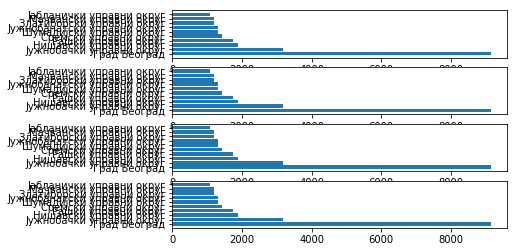

In [33]:
import matplotlib.pyplot as plt
t = skole.groupby("Okrug")["Broj devojcica - prvi razred"].sum().sort_values(ascending = False).head(10)
for i in range(1,4+1):
    plt.subplot(4, 1, i)
    plt.barh(t.index, t)

plt.show()

In [ ]:
t.plot.bar()

In [11]:
skole[["Okrug"]]

,Okrug
0,Град Београд
1,Град Београд
2,Град Београд
3,Град Београд
4,Град Београд
...,...
1418,Рашки управни округ
1419,Рашки управни округ
1420,Рашки управни округ
1421,Рашки управни округ
